In [1]:
import os 
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from scipy.stats import gaussian_kde
import networkx as nx

import seaborn as sns
import jenkspy

In [2]:
data_dir = "../data"

In [3]:
region = gpd.read_file("../data/region-2014/MP14_REGION_WEB_PL.shp")
parea = gpd.read_file("../data/planning-area-2014/MP14_PLNG_AREA_WEB_PL.shp")

In [4]:
subzone_fp = os.path.join(data_dir, "subzone-2014", "MP14_SUBZONE_WEB_PL.shp")
subzone = gpd.read_file(subzone_fp)
subzone.head()

,OBJECTID,SUBZONE_NO,SUBZONE_N,SUBZONE_C,CA_IND,PLN_AREA_N,PLN_AREA_C,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area,geometry
0,1,1,MARINA SOUTH,MSSZ01,Y,MARINA SOUTH,MS,CENTRAL REGION,CR,5ED7EB253F99252E,2014-12-05,31595.8357,29220.1873,5267.381024,1.630379e+06,"POLYGON ((31495.560 30140.012, 31980.957 29671..."
1,2,1,PEARL'S HILL,OTSZ01,Y,OUTRAM,OT,CENTRAL REGION,CR,8C7149B9EB32EEFC,2014-12-05,28679.0634,29782.0519,3506.107376,5.598162e+05,"POLYGON ((29092.275 30021.888, 29119.641 30006..."
2,3,3,BOAT QUAY,SRSZ03,Y,SINGAPORE RIVER,SR,CENTRAL REGION,CR,C35FEFF02B13E0E5,2014-12-05,29654.9594,29974.6553,1740.925766,1.608075e+05,"POLYGON ((29932.332 29879.120, 29947.317 29858..."
3,4,8,HENDERSON HILL,BMSZ08,N,BUKIT MERAH,BM,CENTRAL REGION,CR,3775D82C5DDBEFBD,2014-12-05,26782.8261,29933.7651,3313.624904,5.954289e+05,"POLYGON ((27131.276 30059.727, 27088.334 29709..."
4,5,3,REDHILL,BMSZ03,N,BUKIT MERAH,BM,CENTRAL REGION,CR,85D9ABEF0A40678F,2014-12-05,26201.9580,30005.7035,2825.594099,3.874294e+05,"POLYGON ((26451.027 30396.458, 26440.474 30361..."


In [5]:
com_res = pd.read_csv("mapequation_com_entropy.csv", index_col=0)
com_res.head()

,node,level_1_weekday,level_1_weekend,weekday_com_ent_in,weekday_com_ent_out,weekend_com_ent_in,weekend_com_ent_out
ind,,,,,,,
0,TAMPINES EAST,1,2,0.353991,0.311314,0.294636,0.294559
1,BEDOK NORTH,1,2,0.229097,0.178567,0.346991,0.281375
2,TOA PAYOH CENTRAL,1,2,0.503925,0.463503,0.519752,0.497265
3,ALJUNIED,1,1,0.401774,0.432890,0.293779,0.342999
4,TAMPINES WEST,1,2,0.249632,0.302093,0.199284,0.215336


In [6]:
ks_res = pd.read_csv("k_shell_decomposition_result_entropy.csv", index_col=0)
ks_res.head()

,node,weekday_in_core,weekday_out_core,weekend_in_core,weekend_out_core,weekday_in_core_lvl,weekday_out_core_lvl,weekend_in_core_lvl,weekend_out_core_lvl,weekday_ksc_ent_in,weekday_ksc_ent_out,weekend_ksc_ent_in,weekend_ksc_ent_out
ind,,,,,,,,,,,,,
0,ADMIRALTY,8845,8436,5350,5185,0,0,0,0,0.997714,0.771458,0.999947,0.779104
1,AIRPORT ROAD,2153,2070,515,500,0,0,0,0,0.665975,0.100550,0.683295,0.324450
2,ALEXANDRA HILL,14278,14023,8195,8136,1,1,1,1,0.679349,0.530146,0.883398,0.521277
3,ALEXANDRA NORTH,5717,6379,2838,2951,0,0,0,0,0.986702,0.551673,0.927997,0.682645
4,ALJUNIED,14278,14023,8195,8377,1,1,1,1,0.524651,0.625371,0.437139,0.536421


In [7]:
stat_res = pd.read_csv("node_density_stat_normalized.csv", index_col=0)
stat_res.head()

,in_degree_weekday,out_degree_weekday,PageRank_weekday,HITS_hub_weekday,HITS_authority_weekday,in_degree_weekend,out_degree_weekend,PageRank_weekend,HITS_hub_weekend,HITS_authority_weekend
node,,,,,,,,,,
ADMIRALTY,0.085027,0.064088,0.095081,0.008601,0.008298,0.102220,0.077090,0.106444,0.018868,0.020532
AIRPORT ROAD,0.011361,0.011493,0.009982,0.004666,0.003565,0.000480,0.001954,0.000290,0.000752,0.000519
ALEXANDRA HILL,0.228828,0.186487,0.251906,0.004467,0.006607,0.220776,0.165543,0.252229,0.009051,0.014105
ALEXANDRA NORTH,0.016157,0.026450,0.016741,0.000569,0.000313,0.010959,0.015612,0.011660,0.000763,0.000551
ALJUNIED,0.585613,0.536596,0.530093,0.123671,0.172411,0.678239,0.641214,0.620737,0.200231,0.289960


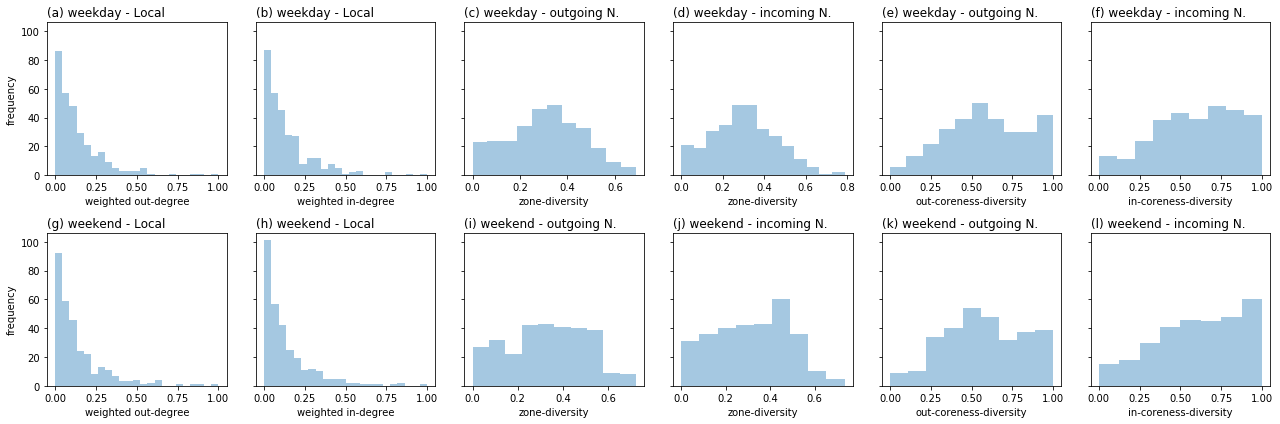

In [8]:
fig, axg = plt.subplots(2, 6, figsize=(18,6), sharey=True)
axs = axg.flatten()

columns = ["out_degree_weekday", "in_degree_weekday", "weekday_com_ent_out", "weekday_com_ent_in", "weekday_ksc_ent_out", "weekday_ksc_ent_in", 
           "out_degree_weekend", "in_degree_weekend", "weekend_com_ent_out", "weekend_com_ent_in", "weekend_ksc_ent_out", "weekend_ksc_ent_in"]
dfs = [stat_res, stat_res, com_res, com_res, ks_res, ks_res] + [stat_res, stat_res, com_res, com_res, ks_res, ks_res]

for i in range(len(columns)):
    df = dfs[i]
    col = columns[i]
    ax = axs[i]
    sns.distplot(df[col], ax=ax, kde=False)

labs = "abcdefghijkl"
labs2 = [ "weekday - Local", "weekday - Local", "weekday - outgoing N.", "weekday - incoming N.", "weekday - outgoing N.", "weekday - incoming N.",
          "weekend - Local", "weekend - Local", "weekend - outgoing N.", "weekend - incoming N.", "weekend - outgoing N.", "weekend - incoming N." ]
xlabs = ["weighted out-degree", "weighted in-degree", "zone-diversity", "zone-diversity", "out-coreness-diversity", "in-coreness-diversity", 
         "weighted out-degree", "weighted in-degree", "zone-diversity", "zone-diversity", "out-coreness-diversity", "in-coreness-diversity"]

for i in range(12):
    ax = axs[i]
    ax.set_title("({}) {}".format(labs[i], labs2[i]), loc="left")
    ax.set_xlabel(xlabs[i])
    
axg[0][0].set_ylabel("frequency")
axg[1][0].set_ylabel("frequency")

plt.tight_layout()


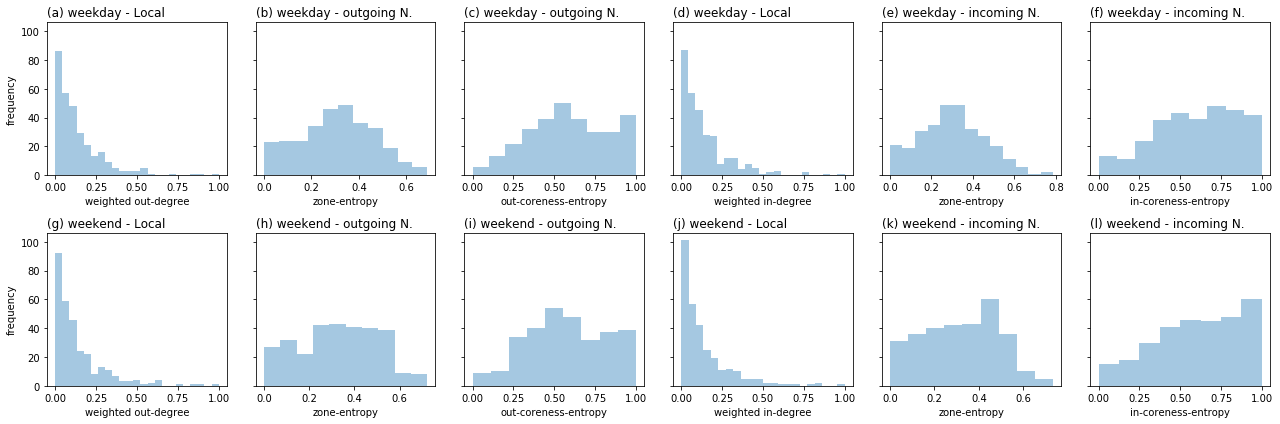

In [15]:
fig, axg = plt.subplots(2, 6, figsize=(18,6), sharey=True)
axs = axg.flatten()

columns = ["out_degree_weekday", "weekday_com_ent_out", "weekday_ksc_ent_out", 
           "in_degree_weekday", "weekday_com_ent_in", "weekday_ksc_ent_in", 
           "out_degree_weekend", "weekend_com_ent_out", "weekend_ksc_ent_out", 
           "in_degree_weekend", "weekend_com_ent_in", "weekend_ksc_ent_in"]

dfs = [stat_res, com_res, ks_res, stat_res, com_res, ks_res] + [stat_res, com_res, ks_res, stat_res, com_res, ks_res]

for i in range(len(columns)):
    df = dfs[i]
    col = columns[i]
    ax = axs[i]
    sns.distplot(df[col], ax=ax, kde=False)

labs = "abcdefghijkl"
labs2 = [ "weekday - Local", "weekday - outgoing N.", "weekday - outgoing N.", 
          "weekday - Local", "weekday - incoming N.", "weekday - incoming N.",
          "weekend - Local", "weekend - outgoing N.", "weekend - outgoing N.", 
          "weekend - Local", "weekend - incoming N.", "weekend - incoming N." ]
xlabs = ["weighted out-degree", "zone-entropy", "out-coreness-entropy", 
         "weighted in-degree" , "zone-entropy", "in-coreness-entropy" , 
         "weighted out-degree", "zone-entropy", "out-coreness-entropy", 
         "weighted in-degree" , "zone-entropy", "in-coreness-entropy"  ]

for i in range(12):
    ax = axs[i]
    ax.set_title("({}) {}".format(labs[i], labs2[i]), loc="left")
    ax.set_xlabel(xlabs[i])

for i in range(2):
    axg[i][0].set_ylabel("frequency")
    
plt.tight_layout()
#plt.savefig("density_and_diversity.png", dpi=100, bbox_inches="tight")

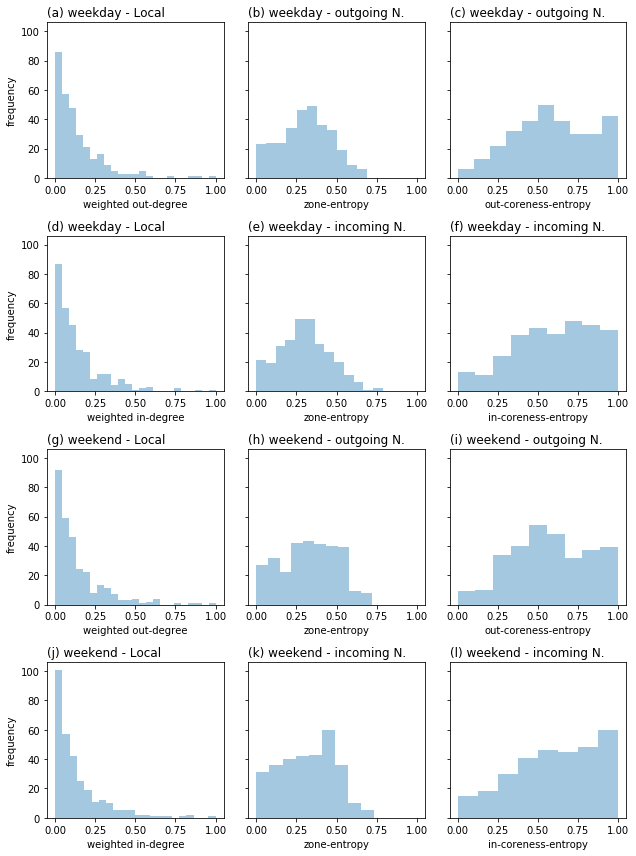

In [11]:
fig, axg = plt.subplots(4, 3, figsize=(9,12), sharey=True, sharex=False)
axs = axg.flatten()

columns = ["out_degree_weekday", "weekday_com_ent_out", "weekday_ksc_ent_out", 
           "in_degree_weekday", "weekday_com_ent_in", "weekday_ksc_ent_in", 
           "out_degree_weekend", "weekend_com_ent_out", "weekend_ksc_ent_out", 
           "in_degree_weekend", "weekend_com_ent_in", "weekend_ksc_ent_in"]

dfs = [stat_res, com_res, ks_res, stat_res, com_res, ks_res] + [stat_res, com_res, ks_res, stat_res, com_res, ks_res]

for i in range(len(columns)):
    df = dfs[i]
    col = columns[i]
    ax = axs[i]
    sns.distplot(df[col], ax=ax, kde=False)

labs = "abcdefghijkl"
labs2 = [ "weekday - Local", "weekday - outgoing N.", "weekday - outgoing N.", 
          "weekday - Local", "weekday - incoming N.", "weekday - incoming N.",
          "weekend - Local", "weekend - outgoing N.", "weekend - outgoing N.", 
          "weekend - Local", "weekend - incoming N.", "weekend - incoming N." ]
xlabs = ["weighted out-degree", "zone-entropy", "out-coreness-entropy", 
         "weighted in-degree" , "zone-entropy", "in-coreness-entropy" , 
         "weighted out-degree", "zone-entropy", "out-coreness-entropy", 
         "weighted in-degree" , "zone-entropy", "in-coreness-entropy"  ]

for i in range(12):
    ax = axs[i]
    ax.set_title("({}) {}".format(labs[i], labs2[i]), loc="left")
    ax.set_xlabel(xlabs[i])
    ax.set_xlim([-0.05,1.05])

for i in range(4):
    axg[i][0].set_ylabel("frequency")
    
plt.tight_layout()
plt.savefig("figs/density_and_diversity.png", dpi=100, bbox_inches="tight")

In [8]:
stat_res2 = stat_res.reset_index()

In [9]:
subzone4 = subzone.merge(stat_res2, left_on="SUBZONE_N", right_on="node")
len(subzone4)

303

In [10]:
subzone2 = subzone.merge(com_res, left_on="SUBZONE_N", right_on="node")
len(subzone2)

303

In [11]:
subzone3 = subzone.merge(ks_res, left_on="SUBZONE_N", right_on="node")
len(subzone3)

303

In [12]:
print(subzone2.columns)
subzone2.head()

Index(['OBJECTID', 'SUBZONE_NO', 'SUBZONE_N', 'SUBZONE_C', 'CA_IND',
       'PLN_AREA_N', 'PLN_AREA_C', 'REGION_N', 'REGION_C', 'INC_CRC',
       'FMEL_UPD_D', 'X_ADDR', 'Y_ADDR', 'SHAPE_Leng', 'SHAPE_Area',
       'geometry', 'node', 'level_1_weekday', 'level_1_weekend',
       'weekday_com_ent_in', 'weekday_com_ent_out', 'weekend_com_ent_in',
       'weekend_com_ent_out'],
      dtype='object')


,OBJECTID,SUBZONE_NO,SUBZONE_N,SUBZONE_C,CA_IND,PLN_AREA_N,PLN_AREA_C,REGION_N,REGION_C,INC_CRC,...,SHAPE_Leng,SHAPE_Area,geometry,node,level_1_weekday,level_1_weekend,weekday_com_ent_in,weekday_com_ent_out,weekend_com_ent_in,weekend_com_ent_out
0,1,1,MARINA SOUTH,MSSZ01,Y,MARINA SOUTH,MS,CENTRAL REGION,CR,5ED7EB253F99252E,...,5267.381024,1.630379e+06,"POLYGON ((31495.560 30140.012, 31980.957 29671...",MARINA SOUTH,2,1,0.000000,0.000000,0.000000,0.000000
1,2,1,PEARL'S HILL,OTSZ01,Y,OUTRAM,OT,CENTRAL REGION,CR,8C7149B9EB32EEFC,...,3506.107376,5.598162e+05,"POLYGON ((29092.275 30021.888, 29119.641 30006...",PEARL'S HILL,2,1,0.158507,0.366017,0.165945,0.417953
2,3,3,BOAT QUAY,SRSZ03,Y,SINGAPORE RIVER,SR,CENTRAL REGION,CR,C35FEFF02B13E0E5,...,1740.925766,1.608075e+05,"POLYGON ((29932.332 29879.120, 29947.317 29858...",BOAT QUAY,2,1,0.373946,0.110996,0.296100,0.161034
3,4,8,HENDERSON HILL,BMSZ08,N,BUKIT MERAH,BM,CENTRAL REGION,CR,3775D82C5DDBEFBD,...,3313.624904,5.954289e+05,"POLYGON ((27131.276 30059.727, 27088.334 29709...",HENDERSON HILL,2,1,0.133264,0.093630,0.120663,0.067389
4,5,3,REDHILL,BMSZ03,N,BUKIT MERAH,BM,CENTRAL REGION,CR,85D9ABEF0A40678F,...,2825.594099,3.874294e+05,"POLYGON ((26451.027 30396.458, 26440.474 30361...",REDHILL,2,1,0.245986,0.173474,0.194026,0.142679


In [13]:
#subzone["X_ADDR"]

In [14]:
def quantile(alist, cut=4):
    b0 = 1./cut
    bs = [ i*b0 for i in range(1, cut+1) ]
    breaks = [ np.quantile(alist, b) for b in bs ]
    print(bs, breaks)
    break_list = []
    for a in alist:
        
        i = 0
        while not(a<=breaks[i]):
            i+=1
        """
        i = cut-1
        while not(a>=breaks[i]):
            i-=1
        """
        break_list.append(i)
        
    return break_list

four_color = sns.color_palette("RdBu_r", 4)

[0.25, 0.5, 0.75, 1.0] [0.03731853561382535, 0.09353217306837036, 0.18590528022548614, 1.0]
[0.25, 0.5, 0.75, 1.0] [0.2022294628529751, 0.3134424610502374, 0.4204190314085616, 0.6884093661170646]
[0.25, 0.5, 0.75, 1.0] [0.40784349878104187, 0.5781262935458834, 0.7765642503802104, 0.9998725685271748]
[0.25, 0.5, 0.75, 1.0] [0.03790269569994551, 0.09282631603539104, 0.18597785908251557, 1.0]
[0.25, 0.5, 0.75, 1.0] [0.19519816052861252, 0.2969323604282661, 0.39982562480973743, 0.7875227237871353]
[0.25, 0.5, 0.75, 1.0] [0.39893933151247096, 0.6224207955232139, 0.8104615641889055, 0.9999979919659332]
[0.25, 0.5, 0.75, 1.0] [0.03225279896312988, 0.08921780459687767, 0.18483858335667158, 1.0]
[0.25, 0.5, 0.75, 1.0] [0.20831361293715023, 0.3429986118253506, 0.46339754736837235, 0.7226831812589256]
[0.25, 0.5, 0.75, 1.0] [0.4045901528332247, 0.566765627111148, 0.7779968208832159, 0.999995573105108]
[0.25, 0.5, 0.75, 1.0] [0.030419715841588604, 0.08726772296575089, 0.18636936675518812, 1.0]
[0.

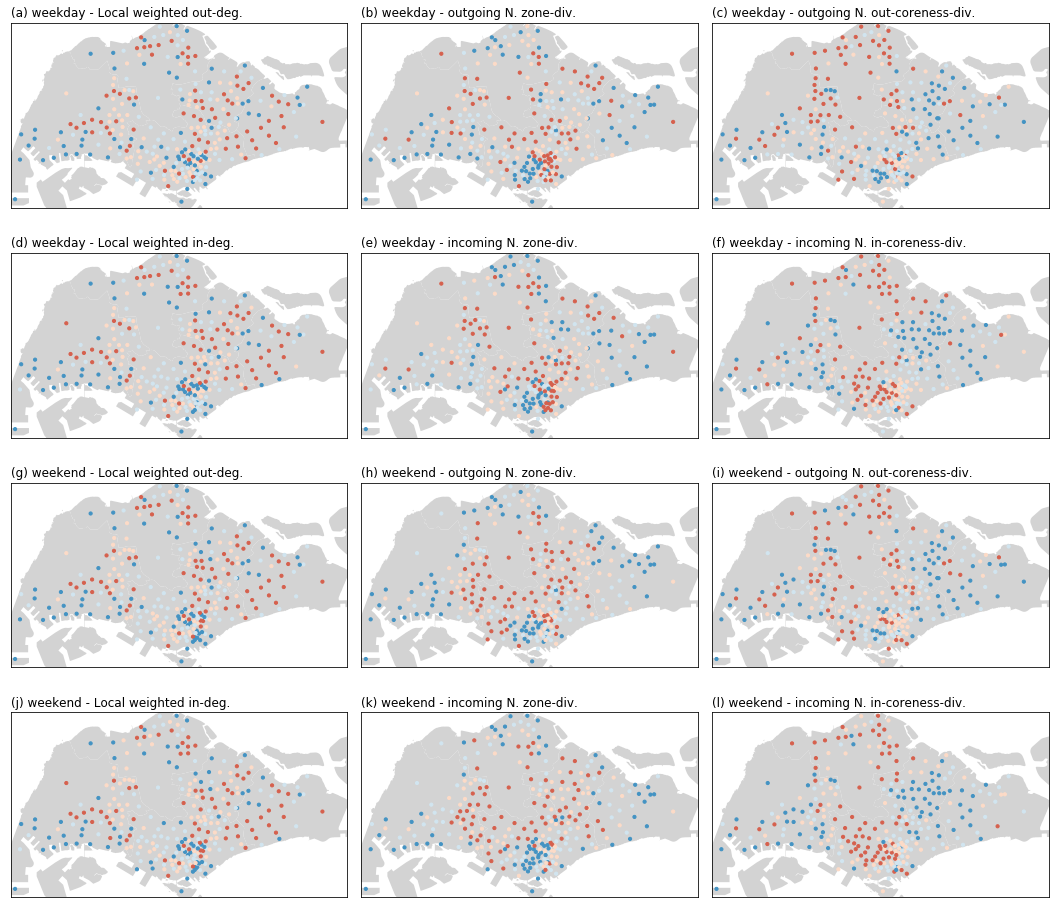

In [67]:
fig, axg = plt.subplots(4, 3, figsize=(15,13), sharey=True, sharex=False)
axs = axg.flatten()

columns = ["out_degree_weekday", "weekday_com_ent_out", "weekday_ksc_ent_out", 
           "in_degree_weekday", "weekday_com_ent_in", "weekday_ksc_ent_in", 
           "out_degree_weekend", "weekend_com_ent_out", "weekend_ksc_ent_out", 
           "in_degree_weekend", "weekend_com_ent_in", "weekend_ksc_ent_in"]

dfs = [subzone4, subzone2, subzone3, subzone4, subzone2, subzone3, subzone4, subzone2, subzone3, subzone4, subzone2, subzone3]

for i in range(len(columns)):
    df = dfs[i]
    col = columns[i]
    ax = axs[i]
    #sns.distplot(df[col], ax=ax, kde=False)
    xx = df["X_ADDR"]
    yy = df["Y_ADDR"]
    s0 = df[col].tolist()
    s1 = quantile(s0)
    cs = [ four_color[c] for c in s1 ]
    ss = [ (s+1)*10 for s in s1 ]
    region.plot(ax=ax, fc="lightgrey")
    ax.scatter(xx, yy, s=10, c=cs)
    

labs = "abcdefghijkl"
labs2 = [ "weekday - Local", "weekday - outgoing N.", "weekday - outgoing N.", 
          "weekday - Local", "weekday - incoming N.", "weekday - incoming N.",
          "weekend - Local", "weekend - outgoing N.", "weekend - outgoing N.", 
          "weekend - Local", "weekend - incoming N.", "weekend - incoming N." ]
xlabs = ["weighted out-deg.", "zone-div.", "out-coreness-div.", 
         "weighted in-deg." , "zone-div.", "in-coreness-div." , 
         "weighted out-deg.", "zone-div.", "out-coreness-div.", 
         "weighted in-deg." , "zone-div.", "in-coreness-div."  ]

for i in range(12):
    ax = axs[i]
    ax.set_title("({}) {} {}".format(labs[i], labs2[i], xlabs[i]), loc="left")
    ax.set_aspect("equal")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim([4500,50000])
    ax.set_ylim([25000,50000])

    
plt.tight_layout()
#plt.savefig("figs/density_and_diversity.png", dpi=100, bbox_inches="tight")

In [63]:
four_color = sns.color_palette("RdBu_r", 4)

In [15]:
sns.set(style="white", font_scale=1.5)

[0.25, 0.5, 0.75, 1.0] [0.03731853561382535, 0.09353217306837036, 0.18590528022548614, 1.0]
[0.25, 0.5, 0.75, 1.0] [0.2022294628529751, 0.3134424610502374, 0.4204190314085616, 0.6884093661170646]
[0.25, 0.5, 0.75, 1.0] [0.40784349878104187, 0.5781262935458834, 0.7765642503802104, 0.9998725685271748]
[0.25, 0.5, 0.75, 1.0] [0.03790269569994551, 0.09282631603539104, 0.18597785908251557, 1.0]
[0.25, 0.5, 0.75, 1.0] [0.19519816052861252, 0.2969323604282661, 0.39982562480973743, 0.7875227237871353]
[0.25, 0.5, 0.75, 1.0] [0.39893933151247096, 0.6224207955232139, 0.8104615641889055, 0.9999979919659332]
[0.25, 0.5, 0.75, 1.0] [0.03225279896312988, 0.08921780459687767, 0.18483858335667158, 1.0]
[0.25, 0.5, 0.75, 1.0] [0.20831361293715023, 0.3429986118253506, 0.46339754736837235, 0.7226831812589256]
[0.25, 0.5, 0.75, 1.0] [0.4045901528332247, 0.566765627111148, 0.7779968208832159, 0.999995573105108]
[0.25, 0.5, 0.75, 1.0] [0.030419715841588604, 0.08726772296575089, 0.18636936675518812, 1.0]
[0.

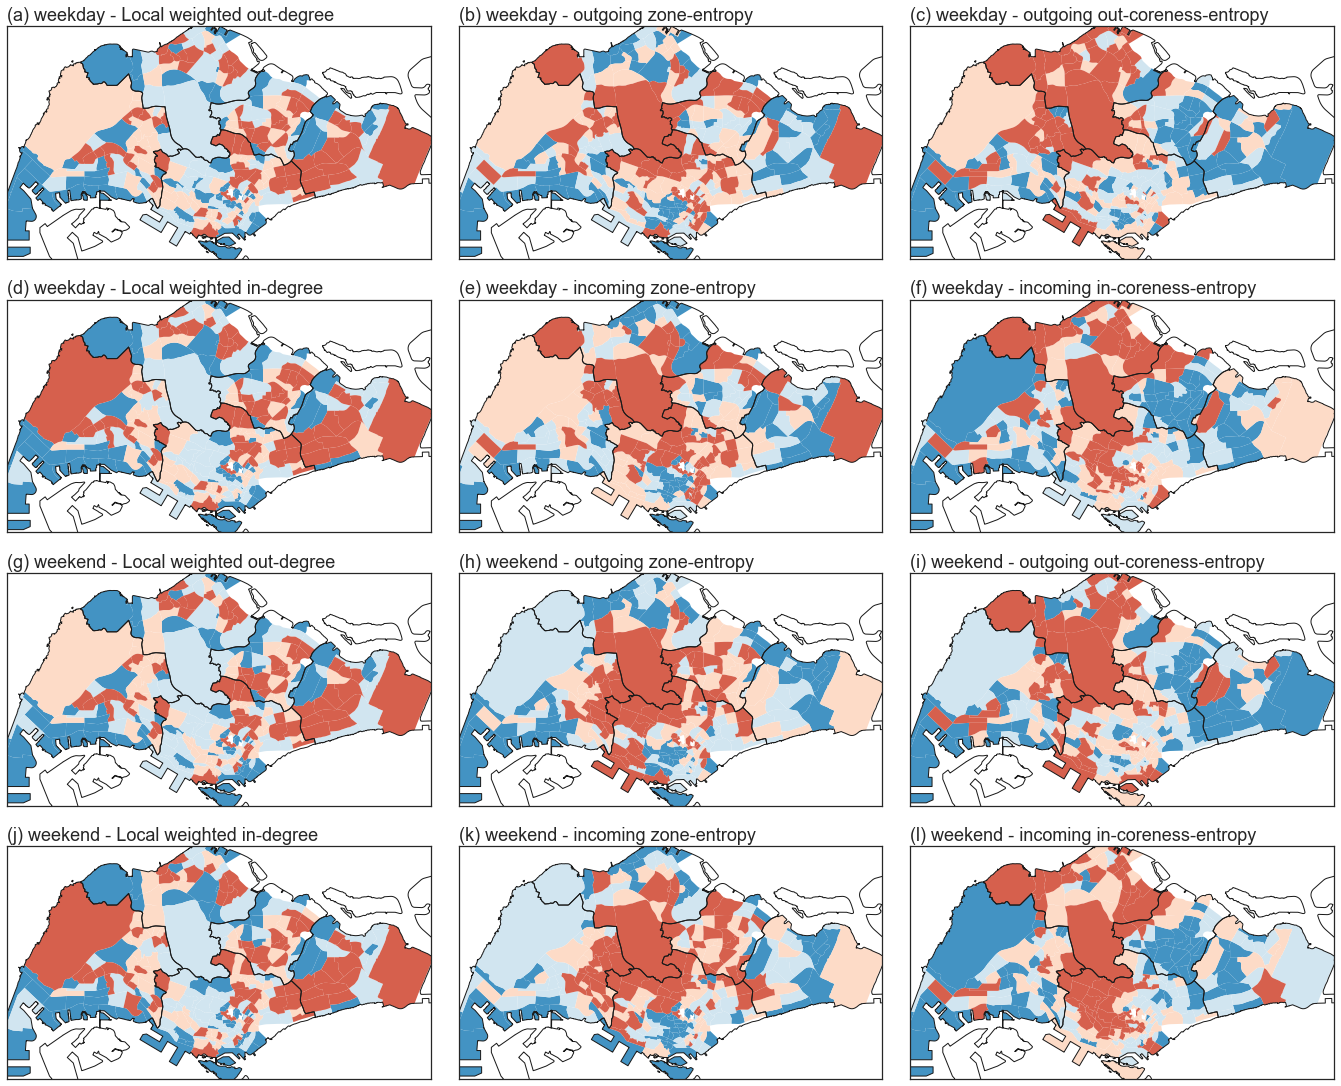

In [20]:
fig, axg = plt.subplots(4, 3, figsize=(19.5,15.5), sharey=True, sharex=False)
axs = axg.flatten()

columns = ["out_degree_weekday", "weekday_com_ent_out", "weekday_ksc_ent_out", 
           "in_degree_weekday", "weekday_com_ent_in", "weekday_ksc_ent_in", 
           "out_degree_weekend", "weekend_com_ent_out", "weekend_ksc_ent_out", 
           "in_degree_weekend", "weekend_com_ent_in", "weekend_ksc_ent_in"]

dfs = [subzone4, subzone2, subzone3, subzone4, subzone2, subzone3, subzone4, subzone2, subzone3, subzone4, subzone2, subzone3]

for i in range(len(columns)):
    df = dfs[i]
    col = columns[i]
    temp = df[[col, "geometry"]].copy()
    ax = axs[i]
    #sns.distplot(df[col], ax=ax, kde=False)
    #xx = df["X_ADDR"]
    #yy = df["Y_ADDR"]
    s0 = temp[col].tolist()
    s1 = quantile(s0)
    temp["cat"] = s1
    for i in range(4):
        temp2 = temp[temp["cat"]==i]
        temp2.plot(ax=ax, color=four_color[i], lw=0, ec="none")
        #print(type(temp2))
        #break
    #break

labs = "abcdefghijkl"
labs2 = [ "weekday - Local", "weekday - outgoing", "weekday - outgoing", 
          "weekday - Local", "weekday - incoming", "weekday - incoming",
          "weekend - Local", "weekend - outgoing", "weekend - outgoing", 
          "weekend - Local", "weekend - incoming", "weekend - incoming" ]
xlabs = ["weighted out-degree", "zone-entropy", "out-coreness-entropy", 
         "weighted in-degree" , "zone-entropy", "in-coreness-entropy" , 
         "weighted out-degree", "zone-entropy", "out-coreness-entropy", 
         "weighted in-degree" , "zone-entropy", "in-coreness-entropy"  ]

for i in range(12):
    ax = axs[i]
    ax.set_title("({}) {} {}".format(labs[i], labs2[i], xlabs[i]), loc="left")
    ax.set_aspect("equal")
    region.plot(ax=ax, fc="none", ec="k")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim([4500,50000])
    ax.set_ylim([25000,50000])

cpatches = []
clabs = ["low", "mid-low", "mid-high", "high"]
for i in range(4):
    patch = mpatches.Patch(color=four_color[i], label=clabs[i])
    cpatches.append(patch)
leg = axg[-1][0].legend(handles=cpatches, loc="lower left", ncol=4, bbox_to_anchor=(0.05, -0.25))
leg.set_in_layout(False)
plt.tight_layout()
plt.savefig("figs/density_and_diversity_map.png", bbox_extra_artists=(leg,), dpi=300, bbox_inches="tight")

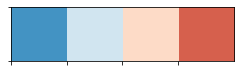

In [60]:
sns.palplot(sns.color_palette("RdBu_r", 4))

In [11]:
merge = pd.merge(com_res, ks_res, left_on="node", right_on="node")
merge.head()

,node,level_1_weekday,level_1_weekend,weekday_com_ent_in,weekday_com_ent_out,weekend_com_ent_in,weekend_com_ent_out,weekday_in_core,weekday_out_core,weekend_in_core,weekend_out_core,weekday_in_core_lvl,weekday_out_core_lvl,weekend_in_core_lvl,weekend_out_core_lvl,weekday_ksc_ent_in,weekday_ksc_ent_out,weekend_ksc_ent_in,weekend_ksc_ent_out
0,TAMPINES EAST,1,2,0.353991,0.311314,0.294636,0.294559,14278,14023,8195,8377,1,1,1,1,0.739688,0.602029,0.742309,0.577384
1,BEDOK NORTH,1,2,0.229097,0.178567,0.346991,0.281375,14278,14023,8195,8377,1,1,1,1,0.278536,0.362557,0.303022,0.385173
2,TOA PAYOH CENTRAL,1,2,0.503925,0.463503,0.519752,0.497265,14278,14023,8195,8377,1,1,1,1,0.862226,0.891770,0.927147,0.953020
3,ALJUNIED,1,1,0.401774,0.432890,0.293779,0.342999,14278,14023,8195,8377,1,1,1,1,0.524651,0.625371,0.437139,0.536421
4,TAMPINES WEST,1,2,0.249632,0.302093,0.199284,0.215336,14278,14023,8195,8377,1,1,1,1,0.246644,0.407002,0.239497,0.342111


In [12]:
merge.columns

Index(['node', 'level_1_weekday', 'level_1_weekend', 'weekday_com_ent_in',
       'weekday_com_ent_out', 'weekend_com_ent_in', 'weekend_com_ent_out',
       'weekday_in_core', 'weekday_out_core', 'weekend_in_core',
       'weekend_out_core', 'weekday_in_core_lvl', 'weekday_out_core_lvl',
       'weekend_in_core_lvl', 'weekend_out_core_lvl', 'weekday_ksc_ent_in',
       'weekday_ksc_ent_out', 'weekend_ksc_ent_in', 'weekend_ksc_ent_out'],
      dtype='object')

In [17]:
xcols = ['weekday_com_ent_in', 'weekday_com_ent_out', 'weekend_com_ent_in', 'weekend_com_ent_out']
ycols = ['weekday_ksc_ent_in', 'weekday_ksc_ent_out', 'weekend_ksc_ent_in', 'weekend_ksc_ent_out']

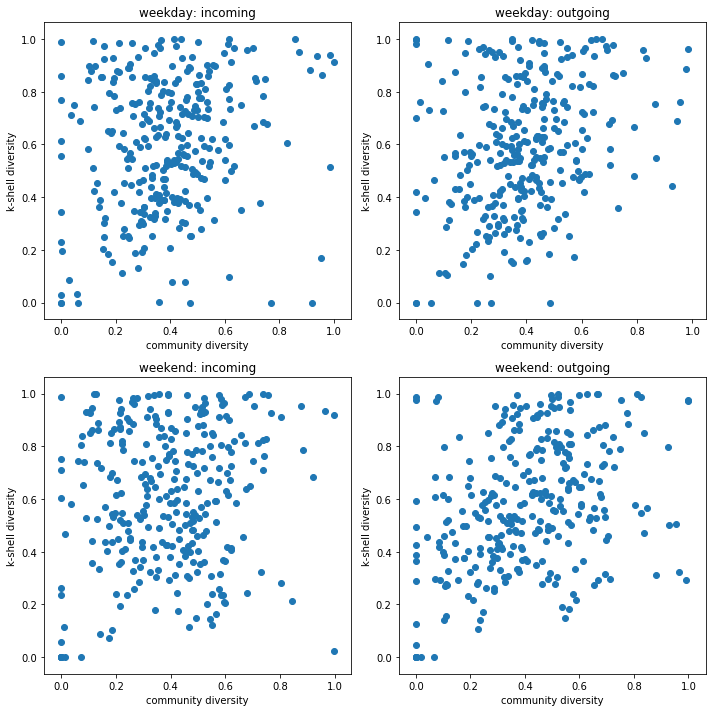

In [19]:
fig, axg = plt.subplots(2,2, figsize=(10,10))
axs = axg.flatten()

labs = "abcd"
labs2 = ["incoming", "outgoing", "incoming", "outgoing"]
for i in range(4):
    ax = axs[i]
    xc = xcols[i]
    yc = ycols[i]
    ax.scatter( merge[xc], merge[yc] )
    ax.set_title("{}: {}".format(xc[:7], labs2[i]))
    ax.set_xlabel("community diversity")
    ax.set_ylabel("k-shell diversity")

plt.tight_layout()

In [11]:
breaks = jenkspy.jenks_breaks(subzone2["weekday_com_ent_in"], nb_class=6)
breaks = [ round(v,4) for v in breaks ]
breaks#[:-1]

[0.0, 0.123, 0.275, 0.4079, 0.5628, 0.7701, 0.9998]